# An Introduction to Classification

* A Statistical Model Revisited
* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Logistic Regression

## A Statistical Model Revisited

Thus far we have looked at statistical models that carry out the regression task.  That is, they take in a set of one or more variables and produce a number.  Specifically, when we say regression we mean:

$$ \hat{y} = mX + b $$

On the right hand side:

Where `X` is a tensor of one or more variables.  When `X` represents a single variable, we call it a vector.  And when `X` represents more than one variable we typically refer to it as a matrix.  However, it is also possible for `X` to represent higher dimensions.

`m` and `b` are just scalars, typically from the real numbers.

On the left hand side:

$\hat{y}$ is also typically from the real numbers.  

And we say that we regress X on y.

One of the important things to note about this procedure is the nature of $\hat{y}$, because it is from the reals it's output carries distance.  That means:

if for a given set of X's $\hat{y}$ = 5.32 and for another set of X's $\hat{y}$ = -1.83 then we can say that the output of the first set of variables is strictly higher than the output of the second set.

It is not always the case that our output being metrizable, that is being measurable in terms of distance, is useful.  It may be the case that our output should not carry any sense of distance or comparison in anyway.

For this we need to introduce a new statistical task, that of classification.

## Classification

The basic idea behind classification is, what if we output a $\hat{y}$ that was categorical rather than continuous?  We've already seen categorical variables in the Applying Statistical Tests chapter.  But more formally, a categorical variable is one in which the different classes are just that, classes.  They are just designations.  So let's say we had two classes, A and B.  They could be classes of anything.  Like tall and short people.  Or young and old people.  Or different flavors of ice cream.  As much as people might try to rank order these different classes, neither is truly better than the other.  

If you want to try a fun experiment, ask some friends what they think about different classes of things, like maybe whether it's better to be young or old, better to be tall or short, better to eat vanilla or chocolate ice cream.  I bet, as long as your friends aren't too similar, they'll all answer differently.  And that's the point!  There is no objective ordering of any of these classes.  And therefore, we cannot define an explicit metric to rank them.

So what?  How are categorical variables useful?  Well turns out they have tons of uses!  We used them extensively in Applying Statistical Tests!  Specifically some of the demographic variables and the converted variable were all categorical.  Without categorical data, we'd never be able to model any of that!  And then we'd be greatly constraining the set of problems we can solve with statistical modeling and analysis.

Hopefully I've convinced you that classification is cool!  Now let's look at a basic definition of it, so we can compare against our regression task.

### Linear Discriminant Analysis

We'll start our analysis of classification by looking at Linear Discriminant Analysis.  This technique was invented by great Ronald Fisher along with many of the other foundations of statistics.

Let's start with the problem set up:

Assume we have two classes and a bunch of data about the population in general.  The data about the population of interest is referred to as features of the data.  And the two classes are called the labels or target.  

To make this practical, let's set up a discrete example:

Assume you want to understand whether someone is likely to vote republican or democrat in the up coming election.  Let's assume you have:

* Age
* Salary
* Location

Let's first generate the dataset, and then we can start to go over the technique:

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import pandas as pd
import random
import numpy as np

df = pd.DataFrame()

df["party"] = [random.choice(["republican", "democrat"])
               for _ in range(2000)]
df["Age"] = np.random.normal(50, 15, size=2000)
df["Age"] = df["Age"].astype(int)
df["Salary"] = np.random.normal(45000, 1500, size=2000)
df["Salary"] = df["Salary"].apply(lambda x: round(x, 2))
df["Latitude"] = np.random.normal(39, 15, size=2000)
df["Latitude"] = df["Latitude"].apply(lambda x: round(x, 4))
df["Longitude"] = np.random.normal(94, 15, size=2000)
df["Longitude"] = df["Longitude"].apply(lambda x: round(x, 4))

In [19]:
df.head()

,party,Age,Salary,Latitude,Longitude
0,democrat,61,44548.66,37.9401,65.7632
1,republican,38,44649.46,36.7487,90.8648
2,republican,58,45752.06,32.5113,110.9692
3,republican,24,43568.75,50.2584,86.1798
4,republican,79,44753.97,31.2356,65.8461


As you can see, we've also generated a target variable, `party`.  This will be what we want our model to predict.  Linear Discriminate Analysis can also be used for dimensionality reduction, which we will look at in a different chapter.

For classification the procedure is:

1. calculate the mean per class per variable.
2. calculate the covariances per class
3. apply the least sum of squares algorithm to the two matrices calculated above and take the first component.
4. use the diaginal of the dot product between the means and the coefficients to recover the intercept.

In [31]:
import numpy as np

def mean_per_class(df, target_column):
    return df.groupby(target_column).agg(np.mean)

def covariance_per_class(df, target_column):
    return df.groupby(target_column).agg(np.cov)

means = mean_per_class(df, "party")
covariances = covariance_per_class(df, "party")
coefficients = np.linalg.lstsq(covariances.values, means.values)[0].T

As you can see, we recover the coefficients!  I decided not to show the intercept because it's a bit complex and doesn't add much in terms of teaching value.  

So, we've covered how you train this classifier.  But how do you make predictions?  This is the major difference between classification and regression.  For regression problems you simply apply your matrix to new data and whatever you output is what you get.  With classification the steps are as follows:

1. apply a decision function, which will give you back the log likelihood ratio of the positive class.  

2. calculate the predicted probabilities for membership to each class are generated from the results of the decision function.

3. Get the classes by taking the argmax, which maps to whichever class has a higher probability associated.

We won't look at those methods explicitly however it is important to know that this is the general procedure for classification.  Let's turn now to making use of scikit-learn's implementation of Linear Discriminant Analysis for a classification task:

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

y = df["party"].map({"republican": 0, "democrat": 1})
X = df[["Age", "Salary", "Longitude", "Latitude"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
clf = LinearDiscriminantAnalysis(solver="lsqr")
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.46      0.59      0.52       209
           1       0.63      0.50      0.56       291

    accuracy                           0.54       500
   macro avg       0.54      0.55      0.54       500
weighted avg       0.56      0.54      0.54       500



While Linear Discriminant Analysis is rarely used for classification because it's many assumptions, namely:

* Each of the variables is independent 
* Each of the variables is normally distributed
* The covariances of variables of each class must be the same.

The third assumption means that the covariance of `Age|republican` must be the same as `Age|democrat`.  An assumption that is rarely met.

We can verify this third assumption via Levene's statistical test, which has the null hypothesis:

* all inputs have the same variance

In [22]:
from scipy import stats

republican = df[df["party"] == "republican"]
democrat = df[df["party"] == "democrat"]
print(stats.levene(republican["Age"], democrat["Age"], center="mean"))
print(stats.levene(republican["Salary"], democrat["Salary"], center="mean"))

LeveneResult(statistic=0.02456965054531071, pvalue=0.8754600091236577)
LeveneResult(statistic=1.2048036089916552, pvalue=0.27249596326066977)


We fail to reject the null hypothesis in all cases!  So our assumptions are met!  Now that we are sure of our analysis, we can do something that we can't do with many of our other classifiers, easily interpret the coefficients of our model!!!

In [23]:
coef = clf.coef_[0]
for index, column in enumerate(["Age", "Salary", "Longitude", "Latitude"]):
    print(column, coef[index])


Age -0.006751944049528613
Salary -5.5718297874918915e-05
Longitude -0.001031102835223785
Latitude 0.005239780367858271


Because we are dealing with binary classification there is only one discriminat function.  We see that `Age` has the largest magnitude and therefore dominates the function used to separate the data into one of the two classes.  In fact, we can directly recover the discriminant score function by taking a linear combination of the data and it's weights:

In [24]:
from functools import partial

def get_score_function(clf, x):
    coef = clf.coef_[0]
    summation = 0
    for index, column in enumerate(["Age", "Salary", "Longitude", "Latitude"]):
        summation += x[column] * coef[index]
    return summation

get_score = partial(get_score_function, clf)

df["score"] = df.apply(get_score, axis=1)

In [25]:
df.head()

,party,Age,Salary,Latitude,Longitude,score
0,democrat,61,44548.66,37.9401,65.7632,-2.763055
1,republican,38,44649.46,36.7487,90.8648,-2.645502
2,republican,58,45752.06,32.5113,110.9692,-2.884908
3,republican,24,43568.75,50.2584,86.1798,-2.415141
4,republican,79,44753.97,31.2356,65.8461,-2.931245


Here we can think of this score as the value that seperates what the classify uses to decide whether the voter is republican or democrat.

Now, just for completeness, let's see what our coefficients would look like with three possible classes:

In [26]:
df_three_party = pd.DataFrame()

df_three_party["party"] = [random.choice(["republican", "democrat", "other"])
                           for _ in range(2000)]
df_three_party["Age"] = np.random.normal(50, 15, size=2000)
df_three_party["Age"] = df_three_party["Age"].astype(int)
df_three_party["Salary"] = np.random.normal(45000, 1500, size=2000)
df_three_party["Salary"] = df_three_party["Salary"].apply(lambda x: round(x, 2))
df_three_party["Latitude"] = np.random.normal(39, 15, size=2000)
df_three_party["Latitude"] = df_three_party["Latitude"].apply(lambda x: round(x, 4))
df_three_party["Longitude"] = np.random.normal(94, 15, size=2000)
df_three_party["Longitude"] = df_three_party["Longitude"].apply(lambda x: round(x, 4))

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

y_three = df_three_party["party"].map({"republican": 0, "democrat": 1, "other": 2})
X_three = df_three_party[["Age", "Salary", "Longitude", "Latitude"]].values
X_train_three, X_test_three, y_train_three, y_test_three = train_test_split(X_three, y_three, random_state=1)
clf = LinearDiscriminantAnalysis(solver="lsqr")
clf.fit(X_train_three, y_train_three)
y_hat_three = clf.predict(X_test_three)
print(classification_report(y_test_three, y_hat_three))

              precision    recall  f1-score   support

           0       0.30      0.21      0.24       164
           1       0.36      0.18      0.24       191
           2       0.27      0.54      0.36       145

    accuracy                           0.29       500
   macro avg       0.31      0.31      0.28       500
weighted avg       0.31      0.29      0.28       500



In [28]:
clf.coef_

array([[0.23809209, 0.02021859, 0.32809829, 0.09160052],
       [0.24152133, 0.02017162, 0.33672914, 0.09618743],
       [0.23650017, 0.0201524 , 0.33376261, 0.09001002]])

As you can see, now there are three discriminant functions which are used to differentiate the data.  Each row represents a different linear discriminant function.

## Quadratic Discriminant Analysis

With Linear Discriminant Analysis we made some very strong assumptions:

* Each of the variables is independent 
* Each of the variables is normally distributed
* The covariances of variables of each class must be the same.

It is unlikely that the third assumption will be met.  This is the major motivation for Quadratic Discriminant Analysis which drops this assumption.  

In Quadratic Discriminant Analysis we therefore drop this assumption.  The other assumptions of Linear Discriminant Analysis persist.  Therefore our assumptions are:

* Each of the variables is independent 
* Each of the variables is normally distributed

In addition to relaxing the equivalence of covariances of classes we also now can have of a quadratic nature, hence the name.  Therefore we can fit these new shapes:

* conic sections
* line
* circles
* ellipse
* parabola
* hyperbola

Notice that we can still fit a line, meaning that quadratic discriminant analysis has a super set of the curve fitting power of linear discriminant analysis.  One of the use cases I haven't discussed yet, is dimensionality reduction.  It is possible to use linear discriminant analysis to do this.  However, with quadratic discriminant analysis, we can only do classification.  So while quadratic discriminant analysis has many desirable features, it doesn't have the flexability of linear discriminant analysis.  We will cover dimensionality reduction in detail in another chapter, so if you don't know what it is, don't worry!

Before we cover quadratic discriminant analysis, you'll need to understand singular value decomposition, which will be necessary for quadratic discriminant analysis, so if you haven't read the linear algebra chapter yet, it is highly recommended that you do so at this point.

Let's look at what's changed in the implementation of quadratic discriminant analysis:

In [32]:
import numpy as np

def quadratic_discriminant_analysis(df, target):
    means = []
    covariances = []
    scalings = []
    rotations = []
    for klass, sub_df in df.groupby(target):
        sub_df.drop(target, axis=1, inplace=True)
        mean = sub_df.mean(0).values
        means.append(mean)
        demeaned_data = sub_df.values - mean
        U, diag, V = np.linalg.svd(demeaned_data, full_matrices=False)
        scaled_diag = (diag ** 2) / (len(sub_df) - 1)
        covariance = np.dot(scaled_diag * V.T, V)
        covariances.append(covariance)
        scalings.append(scaled_diag)
        rotations.append(V.T)
    return means, covariances, scalings, rotations

means, covariances, scalings, rotations = quadratic_discriminant_analysis(df, "party")

As you can see from the above code, just like with linear discriminant analysis we still take the mean and covariance.  However, we no longer apply least squares optimization.  Now we are making use of singular value decomposition, which is what allows for the non linearities.  Also note, we estimate the covariances from our optimization operation, rather than simply computing them directly.  

Now let's see an example of quadratic discriminant analysis with scikit-learn!

In [37]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.45      0.58      0.51       209
           1       0.62      0.49      0.55       291

    accuracy                           0.53       500
   macro avg       0.53      0.54      0.53       500
weighted avg       0.55      0.53      0.53       500



Comparing this against linear discriminant analysis:
    
```
              precision    recall  f1-score   support

           0       0.46      0.59      0.52       209
           1       0.63      0.50      0.56       291

    accuracy                           0.54       500
   macro avg       0.54      0.55      0.54       500
weighted avg       0.56      0.54      0.54       500
```

We can see the two classifiers are approximately the same.  However, now let's look at what happens when the equality of covariance assumption is violated:

In [5]:
import random
import pandas as pd
import numpy as np

df_cov = pd.DataFrame()

def split_unevenly(df):
    half = len(df)/2
    if int(half) != half:
        return int(half)+1, int(half)
    return int(half), int(half)

df_cov["party"] = [random.choice(["republican", "democrat"])
                   for _ in range(2000)]
democrat = df_cov[df_cov["party"] == "democrat"]
republican = df_cov[df_cov["party"] == "republican"]
first_half_republican, second_half_republican = split_unevenly(republican)
first_half_democrat, second_half_democrat = split_unevenly(democrat)

democrat["Age"] = np.random.normal(35, 19, size=len(democrat))
democrat["Age"] = democrat["Age"].astype(int)
republican["Age"] = np.random.normal(55, 10, size=len(republican))
republican["Age"] = republican["Age"].astype(int)

democrat["Salary"] = np.random.normal(65000, 15000, size=len(democrat))
democrat["Salary"] = democrat["Salary"].apply(lambda x: round(x, 2))
republican["Salary"] = np.concatenate([
    np.random.normal(25000, 1500, size=first_half_republican),
    np.random.normal(155000, 10000, size=second_half_republican)
])
republican["Salary"] = republican["Salary"].apply(lambda x: round(x, 2))

democrat["Latitude"] = np.concatenate([
    np.random.normal(40, 1, size=first_half_democrat),
    np.random.normal(34, 1, size=second_half_democrat)
])
democrat["Latitude"] = democrat["Latitude"].apply(lambda x: round(x, 4))
republican["Latitude"] = np.random.normal(39, 15, size=len(republican))
republican["Latitude"] = republican["Latitude"].apply(lambda x: round(x, 4))

democrat["Longitude"] = np.random.normal(94, 15, size=len(democrat))
democrat["Longitude"] = democrat["Longitude"].apply(lambda x: round(x, 4))
republican["Longitude"] = np.random.normal(94, 15, size=len(republican))
republican["Longitude"] = republican["Longitude"].apply(lambda x: round(x, 4))

df_cov = pd.concat([democrat, republican])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

y_cov = df_cov["party"].map({"republican": 0, "democrat": 1})
X_cov = df_cov[["Age", "Salary", "Longitude", "Latitude"]].values
X_train_cov, X_test_cov, y_train_cov, y_test_cov = train_test_split(X_cov, y_cov, random_state=1)
linear_clf = LinearDiscriminantAnalysis(solver="lsqr")
linear_clf.fit(X_train_cov, y_train_cov)
y_hat_cov = linear_clf.predict(X_test_cov)
print(classification_report(y_test_cov, y_hat_cov))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       245
           1       0.75      0.68      0.71       255

    accuracy                           0.72       500
   macro avg       0.72      0.72      0.72       500
weighted avg       0.72      0.72      0.72       500



In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

quad_clf = QuadraticDiscriminantAnalysis()
quad_clf.fit(X_train_cov, y_train_cov)
y_hat_cov = quad_clf.predict(X_test_cov)
print(classification_report(y_test_cov, y_hat_cov))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       241
           1       0.98      0.97      0.98       259

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



As you can see, when we relax the equivalence of covariance assumption linear discriminant analysis does much worse than quadratic discriminant analysis.  However, we lose interpretability of our discrinant function.  Quadratic Discriminant Analysis doesn't even come with a `coef_` attribute, which means are ability to interpret our results is somewhat limited.  As is seemingly always the case with this sort of thing, by relaxing assumptions we lose interpretability.  But we make up that lose with an increase in statistical performance, as is evidenced here.

## Logistic Regression

Now that we've gone over linear and quadratic discriminant analysis it's time to touch upon the most widely used version of the linear classifier models, logistic regression.

Let's describe our Logistic Regression problem explicitly.  Start by assuming two independent variables $x_{1}$, $x_{2}$ and one dependent binary variable from a Bernoulli distribution.  Then we have:

$$ l = log_{b} \frac{p}{1-p} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} $$

Here $\log_{b}\frac{p}{1-p}$ is referred to as the log odds.  Logistic Regression requires almost none of the assumptions that linear regression requires.  Here they are:

* independence of observations.
* no multicollinearity between independent variables
* a linear relationship with the log odds, as specified in the above equation.


Next lets try to understand odds, first let's review a contingency table:

In [16]:
import pandas as pd
from scipy import stats

A_size = 1000
B_size = 1000
A_probability = 0.15
A_exposed_probability = 0.3
B_probability = 0.1
B_exposed_probability = 0.26
A_dist = stats.bernoulli(A_probability)
A_exposed_dist = stats.bernoulli(A_exposed_probability)
B_dist = stats.bernoulli(B_probability)
B_exposed_dist = stats.bernoulli(B_exposed_probability)

df_A = pd.DataFrame()
df_A["diagnosed"] = A_dist.rvs(size=A_size)
df_A["exposed"] = A_exposed_dist.rvs(size=A_size)
df_A["group"] = "A"
df_B = pd.DataFrame()
df_B["diagnosed"] = B_dist.rvs(size=B_size)
df_B["exposed"] = B_exposed_dist.rvs(size=B_size)
df_B["group"] = "B"
contingency_df = df_A.append(df_B)

summary = contingency_df.pivot_table(values="diagnosed", index='group', aggfunc=np.sum)
# add additional columns to the pivot table
summary['exposed'] = contingency_df.pivot_table(values="exposed", index='group', aggfunc=np.sum)
summary

,diagnosed,exposed
group,,
A,142,321
B,106,240


Now that we a contingency table we can calculate the odds ratio as:

In [17]:
numerator = (summary["diagnosed"]["A"]/summary["exposed"]["A"])
denominator = (summary["diagnosed"]["B"]/summary["exposed"]["B"])
numerator/denominator

1.0015870216892964

The way to interpret the odds ratio is as follows:

* If the odds ratio is equal to one then the variables are independent.
* If the odds ratio is greater than one then there is a positive correlation between variables.
* If the odds ratio is less than one then there is a negative correlation between the variables.

Just for completeness, let's look at an example where there is a known association between the variables:

In [14]:
import pandas as pd
import numpy as np
from scipy import stats

A_size = 1000

A_probability = 0.15
A_exposed_probability = 0.3
A_dist = stats.bernoulli(A_probability)
A_exposed_dist = stats.bernoulli(A_exposed_probability)

df_A = pd.DataFrame()
df_A["diagnosed"] = A_dist.rvs(size=A_size)
df_A["exposed"] = A_exposed_dist.rvs(size=A_size)
df_A["group"] = np.nan
for i in range(500):
    df_A.iloc[i, df_A.columns.get_loc('group')] = "A One"
for i in range(500, 1000):
    df_A.iloc[i, df_A.columns.get_loc('group')] = "A Two"

summary = df_A.pivot_table(values="diagnosed", index='group', aggfunc=np.sum)
# add additional columns to the pivot table
summary['exposed'] = df_A.pivot_table(values="exposed", index='group', aggfunc=np.sum)
summary

,diagnosed,exposed
group,,
A One,79,175
A Two,64,168


In [15]:
numerator = (summary["diagnosed"]["A One"]/summary["exposed"]["A One"])
denominator = (summary["diagnosed"]["A Two"]/summary["exposed"]["A Two"])
numerator/denominator

1.185

As you can see the value is clearly over one now because both samples came from the same distribution!  Now let's bring in the log function.  The log odds is known as the logit function.  It has the following domain and codomain:

$$ logit: (0,1) \rightarrow (-\inf, \inf) $$

We can see this visually as:

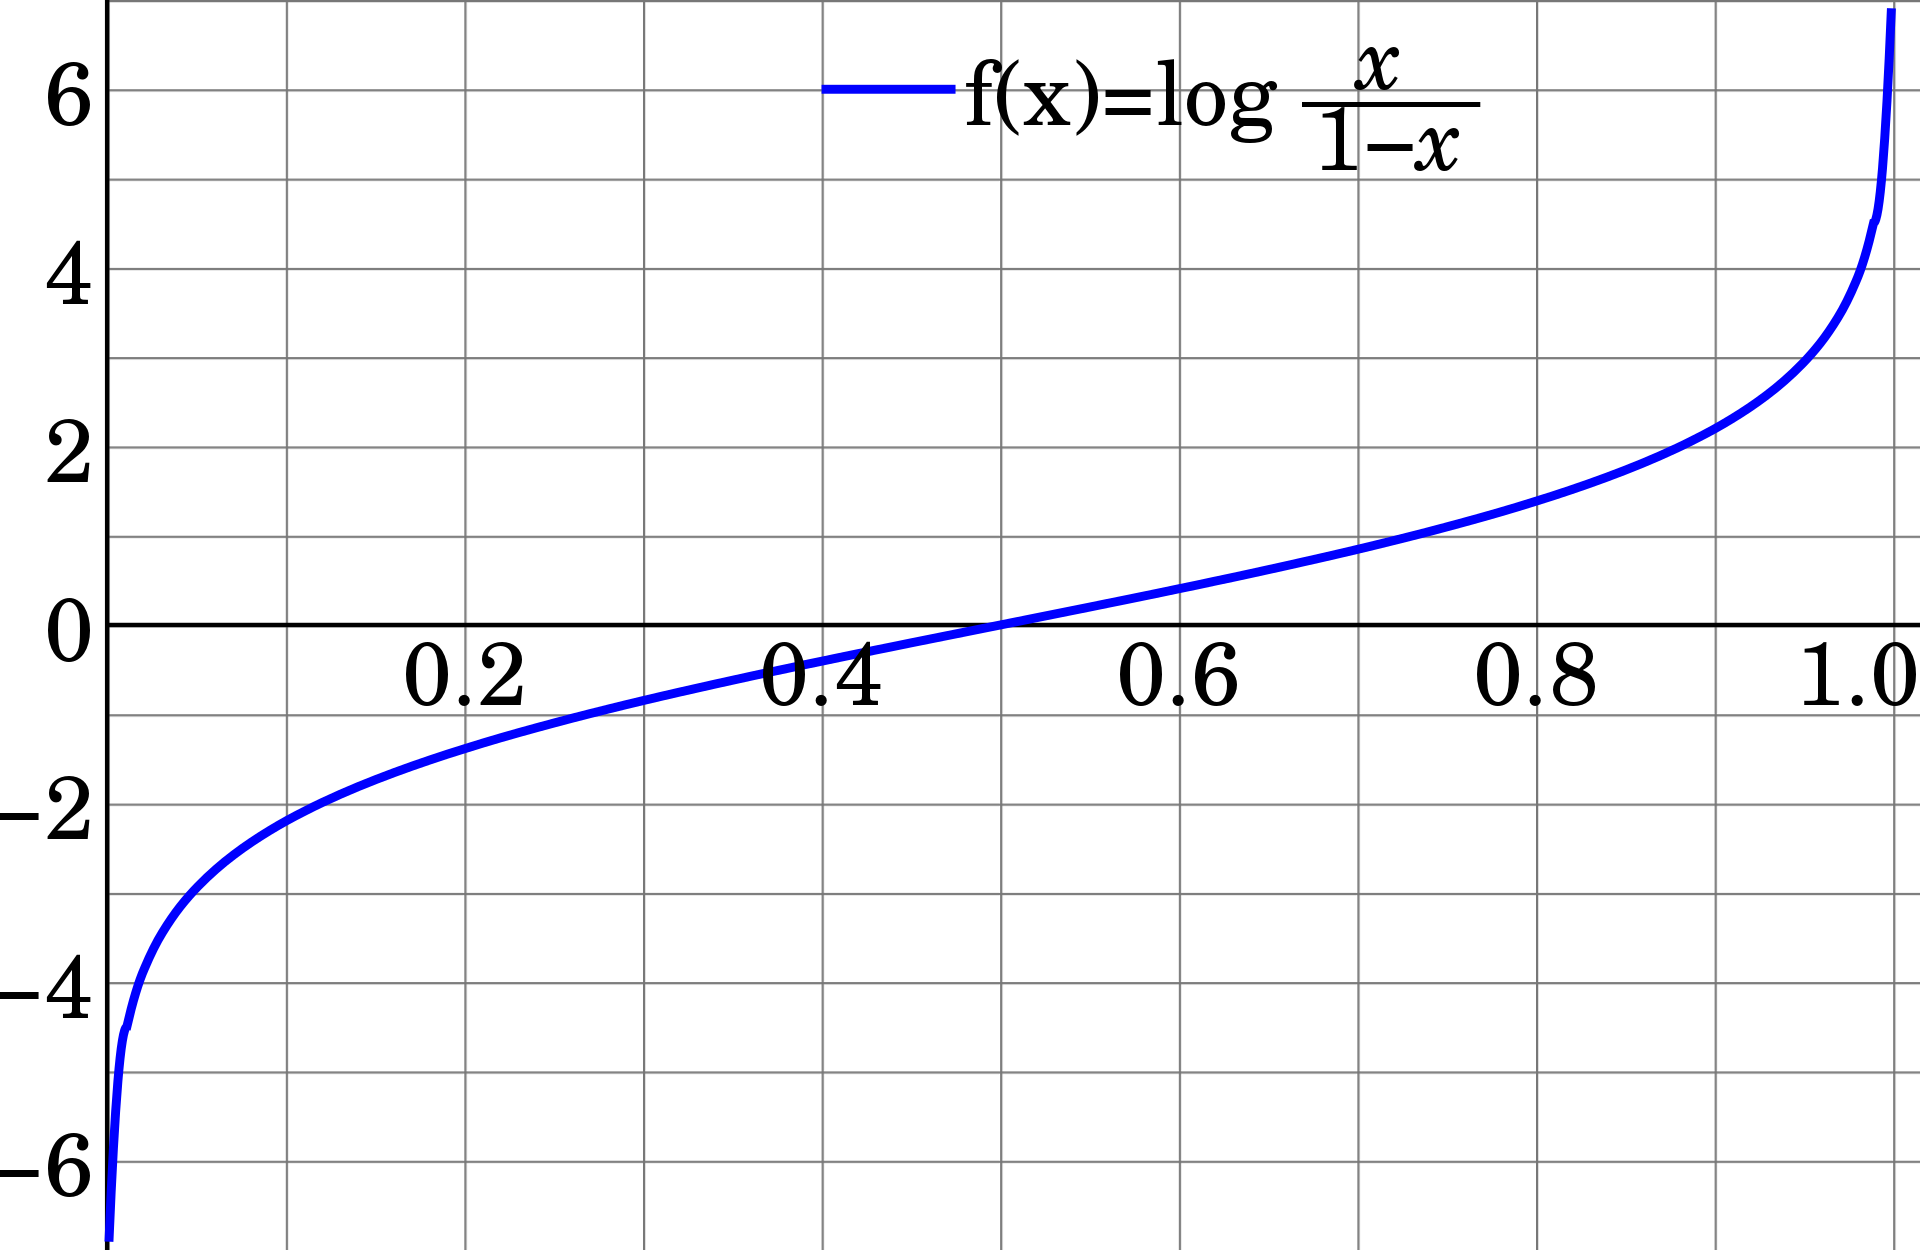

In [38]:
from IPython.display import Image
Image(filename="logit.png", height=600, width=600)

As you can see, asymptotically approach (-infinity, +infinity) on the y axis.  This allows us to "recover" a linear regression problem by transforming our discrete dependent variable into a continuous one.  Next we apply a logistic function, which looks like:

$$ f(x) = \frac{L}{1 + e^{-k(x-x_{0})}} $$

Where 

* $L$ = the cur'ves maximum value

* $e$ = the natural log base, aka Euler's number

* $x_{0}$ = the x-value of the sigmoid's midpoint

* $k$ = the logistic growth rate or steepness of the curve

This logistic function takes the output x to the range (0,1).  Thus the mapping looks like:

$$ logistic: (-\inf, \inf) \rightarrow (0,1) $$ 

So basically, we start with a binary dependent variable problem, transform it into a linear regression problem and then transform it back into a binary dependent variable problem.  This is the general framework for interpretting an already fit logistic regression.  It helps us motivate the link function (if you don't understand link functions, see the chapter on linear regression) for logistic regression.  However, this intuition does not translate towards fitting a logistic regression model.  This is because our dependent variable is Bernoulli distributed rather than normally distributed.  This implies, we do not have a closed form solution and therefore cannot apply least squares to our transformed linear model.  Therefore we must make use of an iterative model to carry out our logistic regression.  For this we will use stochast gradient descent.

-- note: add more detail here as to why this won't work.  Mentioning is not enough.

## Stochastic Gradient Descent

Like in the linear regression chapter we will make use of the gradient to approximate our parameters for logistic regression.  The fitting procedure will be similar therefore an exhaustive explanation will not be provided.  First let's set up the general procedure for gradient descent:

1. Initialize the weights
2. get the scores by taking the dot product of weights and features
3. apply the link function to get predictions
4. apply the decision function to the predictions
5. calculate the loss
6. calculate the gradient of the loss
7. update the weights
8. repeat until cost is below the threshold

In [7]:
import numpy as np 
import math

# Put stochastic gradient descent 
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def inf_log(arr):
    arr = np.log(arr)
    arr[arr == np.inf] = 99999
    arr[arr == -np.inf] = -99999
    return arr

def cost_function(y, predictions): 
    step1 = (y * inf_log(predictions))
    step2 = (1 - y) * inf_log(1 - predictions)
    final = step1 + step2
    final *= -1 
    return np.nanmean(final)

def decision_function(arr, threshold=0.5):
    return np.where(arr>threshold, 1, 0)

def logistic_regression(X, y, learning_rate, steepness=1, tolerance=0.1, max_iter=10000, add_intercept = False, debugging=False):
    if add_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    
    step = 0
    weights = np.zeros(X.shape[1])
    cost = 100000
    costs = set()
    while cost > tolerance:
        scores = np.dot(X, weights)
        scores *= steepness
        predictions = sigmoid(scores)
        predictions = decision_function(predictions)
        error = y - predictions
        gradient = np.dot(X.T, error)
        weights += learning_rate * gradient
        cost = cost_function(y, predictions)
        cost = abs(cost)
        if pd.isnull(cost):
            cost = 10000
        if debugging:
            if step % 1000 == 0:
                print("percent correct", len(error[error == 0])/len(error))
                print("cost", cost)
        step += 1
        if step > max_iter:
            break
    return weights

logistic_regression(X_cov, y_cov, learning_rate = 5e-8, add_intercept=True, debugging=True)

percent correct 0.5025
cost 49749.5025
percent correct 0.4975
cost 50249.4975
percent correct 0.5025
cost 49749.5025
percent correct 0.5025
cost 49749.5025
percent correct 0.4975
cost 50249.4975
percent correct 0.5025
cost 49749.5025
percent correct 0.5025
cost 49749.5025
percent correct 0.5025
cost 49749.5025
percent correct 0.4975
cost 50249.4975
percent correct 0.5025
cost 49749.5025
percent correct 0.5025
cost 49749.5025


array([ 0.0806502 , -1.13655345,  2.15671482,  7.54445712,  2.53471749])

Some things to note about this code:

1. The cost function - We never explicitly talked about this, so what is our cost function?  Here we use cross entropy loss.  This is discussed in detailed in the An Introduction To Information Theory chapter so we won't cover it in detail here.  However let's at least note the formula:



$$ -log(P(y_{true} | y_{prediction})) = -(y_{true}*log(y_{prediction}) + (1 - y_{true})*log(1 - y_{prediction})) $$

2. The cost never converges - We might look at this and think, is our logistic regression implementation faulty?  And in fact, when first looking at this, that is what I thought as well.  But I think this is actually correct.  The reason it doesn't converge is because there isn't a connection between the independent and dependent variables.  Any connection that an algorithm picks up, is in fact a spurious connection.  So we shouldn't expect to see a convergence!

3. percent correct - This is basically accuracy.  It counts the number of times the predicted label - true label is zero.  This will be the case whenever the label is correct.  As you can see logistic regression struggles with this quiet a bit!  And for the reason stated above, all associations are spurious.  Therefore we shouldn't expect logistic regression to do better than random!  

4. Why we initialize the cost so high - the reason we start the cost so high is to ensure the learning process kicks off.  If we start the cost at zero, then the condition `cost > tolerance` would not hold and we would learn nothing!  We set it that high because tolerance is a setable parameter.  And it is highly unlikely someone would randomly choose a tolerance that high.  Yet of course, tolerance should always be a relatively small number!

Next, let's look at how our implementation does when we actually have an association between our input and output data:

In [80]:
from sklearn.datasets import make_classification

X_synthetic, y_synthetic = make_classification(n_samples=2000, n_features=5, n_informative=2)
weights = logistic_regression(
    X_synthetic, y_synthetic, 
    learning_rate = 5e-5, 
    max_iter=10000,  
    debugging=True,
    tolerance=0.0001
)

percent correct 0.4995
cost 50049.4995
percent correct 0.9385
cost 6149.9385
percent correct 0.9045
cost 9549.9045
percent correct 0.939
cost 6099.939
percent correct 0.9385
cost 6149.9385
percent correct 0.937
cost 6299.937
percent correct 0.9385
cost 6149.9385
percent correct 0.935
cost 6499.935
percent correct 0.8085
cost 19149.8085
percent correct 0.938
cost 6199.938
percent correct 0.938
cost 6199.938


While our cost does not go down uniformly, clearly it does much better when there is an actual association!  So this is inline with what we'd expect.  Let's look at how scikit-learn handles both of these cases:

In [96]:
from sklearn.linear_model import LogisticRegression

logit_clf = LogisticRegression(C= 1e15)
logit_clf.fit(X_train_cov, y_train_cov)
y_hat_cov = logit_clf.predict(X_test_cov)
print(classification_report(y_test_cov, y_hat_cov))
print(logit_clf.coef_)

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       253
           1       0.76      0.68      0.72       247

    accuracy                           0.74       500
   macro avg       0.74      0.74      0.74       500
weighted avg       0.74      0.74      0.74       500

[[-7.39671440e-02 -7.21439394e-06  3.84394184e-02  5.47035795e-03]]


It looks like scikit-learn's implementation "finds" a pattern even though this is a spurious correlation.  This is probably due to the various normalizations that scikit-learn's implementation produces.  Even if you set C very close to zero, unregularizing the classifier, normalization is still happening.  So a spurious assocation is discovered.  How might you deal with this in the real world?  I'd recommend checking to see if your independent variable and dependent variable are correlated before carrying out any modeling procedure.  As well as to see if they are correlated.  One can do that as follows:

### Test For Independence

In this case we have a binary dependent variable and continuous independent variables, so we need a test that accounts for this.  So we will make use of the Kruskal Wallis H test:

In [9]:
from scipy import stats

print("Age", stats.kruskal(y_cov, X_cov.T[0]))
print("Salary", stats.kruskal(y_cov, X_cov.T[1]))
print("Longitude", stats.kruskal(y_cov, X_cov.T[2]))
print("Latitude", stats.kruskal(y_cov, X_cov.T[3]))

Age KruskalResult(statistic=2891.739819977506, pvalue=0.0)
Salary KruskalResult(statistic=3096.007590212157, pvalue=0.0)
Longitude KruskalResult(statistic=3096.0075914106146, pvalue=0.0)
Latitude KruskalResult(statistic=3062.060559126142, pvalue=0.0)


The null hypothesis states that the samples are independent.  With a pvalue of 0 for all tests, we reject the null hypothesis.  Next let's check for correlation.

In [8]:
from scipy import stats

print("Age", stats.pointbiserialr(y_cov, X_cov.T[0]))
print("Salary", stats.pointbiserialr(y_cov, X_cov.T[1]))
print("Longitude", stats.pointbiserialr(y_cov, X_cov.T[2]))
print("Latitude", stats.pointbiserialr(y_cov, X_cov.T[3]))

Age PointbiserialrResult(correlation=-0.5353503486539664, pvalue=1.0050449552375386e-148)
Salary PointbiserialrResult(correlation=-0.2555718407894013, pvalue=3.4254419601593957e-31)
Longitude PointbiserialrResult(correlation=-0.0042012798366462805, pvalue=0.8510567096555385)
Latitude PointbiserialrResult(correlation=-0.09632396567232096, pvalue=1.5954338456662734e-05)


The null hypothesis states that the two variables are uncorrelated.  Since we segmented our data based on party affiliation, it should come as no surprise that the data is correlated, except for Longitude.  Recall that we draw from the same distribution with the same shape parameters for Longitude.

So it's clear that there _is_ a relationship that can be learned and what our algorithm recovered is not in fact spurious.  Next let's look how to interpret logistic regression:

In [83]:
from sklearn.linear_model import LogisticRegression

X_synthetic, y_synthetic = make_classification(n_samples=2000, n_features=5, n_informative=2)
X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic)
logit_clf = LogisticRegression(C= 1e15)
logit_clf.fit(X_train_synthetic, y_train_synthetic)
y_hat_synthetic = logit_clf.predict(X_test_synthetic)
print(classification_report(y_test_synthetic, y_hat_synthetic))
print(logit_clf.coef_)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       251
           1       0.91      0.88      0.90       249

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500

[[ 1.29595774 -0.18735592 -0.0976952   1.67962722 -0.84751533]]


To understand how to interpret our coefficients recall the original form of our logistic regression:

$$ log(\frac{p}{1-p}) = \beta_{1}x_{1} + \beta_{2}x_{2} + \beta_{3}x_{3} + \beta_{4}x_{4} + \beta_{5}x_{5} $$

We can invert this equation to be:

$$ p = \frac{1}{1- b^{-(\beta_{1}x_{1} + \beta_{2}x_{2} + \beta_{3}x_{3} + \beta_{4}x_{4} + \beta_{5}x_{5})}} $$

The important thing to note is of course:

$$ \beta_{1}x_{1} + \beta_{2}x_{2} + \beta_{3}x_{3} + \beta_{4}x_{4} + \beta_{5}x_{5} $$

Let's look at our specific example, plugging in the coefficients:

$$ 1.29595774 * x_{1} + -0.18735592 * x_{2} + -0.0976952 * x_{3} + 1.67962722 * x_{4} + -0.84751533 * x_{5} $$

We can now look marginally at some of the parameters:

It's important to note that for binary classification, everything is in the context of `Y=1`.

So if $x_{1}$ were to increase by one that would lead to an increase in the probability that the classifer predicts one by:

$$ b^{1.29595774} $$

From scikit-learn's github implementation as well as this blog post: http://fa.bianp.net/blog/2013/numerical-optimizers-for-logistic-regression/ it appears as though the base is the natural number $e$

Therefore we have:

$$ e^{1.29595774} = 3.6544943540273094 $$

So if $x_{1}$ increases generally then the probability that `Y=1` increases by a rate of `3.6544943540273094`.  Similarly the rates of towards a decision of `Y=1` and away from decision `Y=1` can be shown by increasing or decreasing each of the $x_{i}$'s.  Let's just look at one more case:

For $x_{4}$ the coefficient is: `1.67962722`.

This means the rate of increase will be:

$$ e^{1.67962722} = 5.363556171932789 $$

Which is almost double!!! So even small changes in our coefficients lead to large shifts in the decision boundary.  So logistic regression can be sensitive to underfitting and overfitting.  Therefore care ought to be taken.  This sort of explains why scikit-learns implementation is scaled and regularized by default.  You want to be sure about your parameters!!  Because being off by a little can lead to large shifts in decisions.

References:
* https://www.datascienceblog.net/post/machine-learning/linear-discriminant-analysis/
* https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/discriminant_analysis.py
* https://beckernick.github.io/logistic-regression-from-scratch/
* https://www.geeksforgeeks.org/understanding-logistic-regression/
* http://fa.bianp.net/blog/2013/numerical-optimizers-for-logistic-regression/